In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date 

In [2]:
df = pd.read_csv('./Dataset/Diwali_Sales_Data.csv')

In [4]:
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [5]:
df.sample()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
6918,1003216,Pratyusmita,P00305942,F,36-45,40,1,Haryana,Northern,Lawyer,Clothing & Apparel,3,7126.0,NaN,NaN


In [6]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Gender            11251 non-null  object 
 2   Age Group         11251 non-null  object 
 3   Age               11251 non-null  int64  
 4   Marital_Status    11251 non-null  int64  
 5   State             11251 non-null  object 
 6   Zone              11251 non-null  object 
 7   Occupation        11251 non-null  object 
 8   Product_Category  11251 non-null  object 
 9   Order_Count       11251 non-null  int64  
 10  Sale_Amount       11239 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 967.0+ KB


In [16]:
df.shape

(11251, 11)

In [18]:
df.columns

Index(['User_ID', 'Gender', 'Age Group', 'Age', 'Marital_Status', 'State',
       'Zone', 'Occupation', 'Product_Category', 'Order_Count', 'Sale_Amount'],
      dtype='object')

## EDA and Data Cleaning
We will perform exploratory data analysis, use groupby, rename columns, and drop multiple columns as done in car sales analysis.

In [7]:
# Drop multiple columns using a list
cols_to_drop = ['Status', 'unnamed1', 'Cust_name', 'Product_ID']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
# Rename columns for clarity
df.rename(columns={'Amount': 'Sale_Amount', 'Orders': 'Order_Count'}, inplace=True)
df.head()

,User_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Order_Count,Sale_Amount
0,1002903,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,F,26-35,35,1,Andhraradesh,Southern,Govt,Auto,3,23934.0
2,1001990,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [8]:
# Group by State and Gender to get total sales and order count
grouped = df.groupby(['State', 'Gender'])[['Sale_Amount', 'Order_Count']].sum().reset_index()
grouped.head()

,State,Gender,Sale_Amount,Order_Count
0,Andhraradesh,F,5511219.99,1394
1,Andhraradesh,M,2525927.00,660
2,Bihar,F,2819281.00,749
3,Bihar,M,1203476.00,313
4,Delhi,F,8264499.45,1872


C:\Users\Dell\AppData\Local\Temp\ipykernel_10692\1876445502.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.values, y=state_sales.index, palette='viridis')
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 60971 (\uee2b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 60971 (\uee2b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


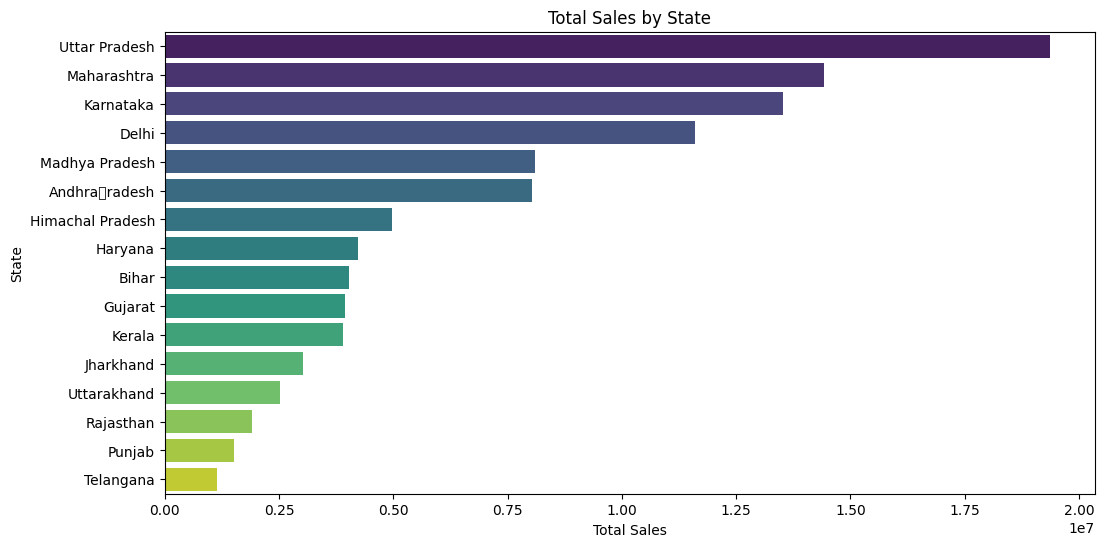

In [9]:
# Plot total sales by State
state_sales = df.groupby('State')['Sale_Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=state_sales.values, y=state_sales.index, palette='viridis')
plt.title('Total Sales by State')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()

<Axes: title={'center': 'Sales Distribution'}, ylabel='Sale_Amount'>

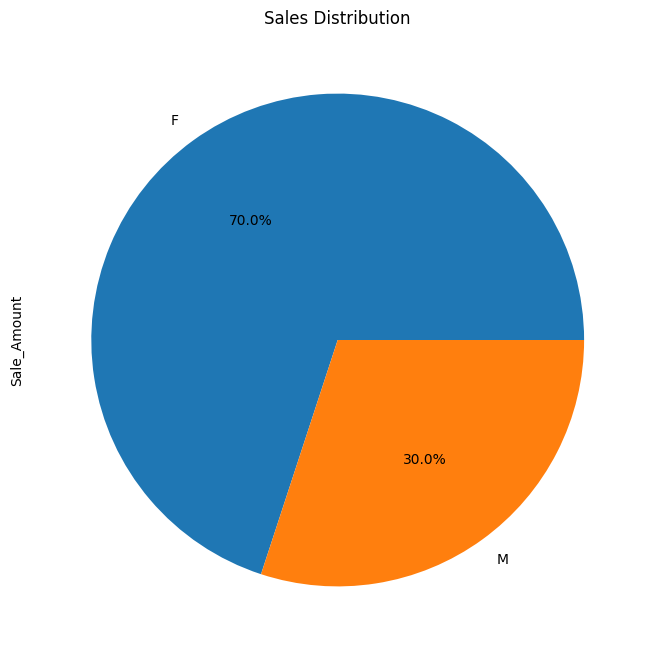

In [21]:
df.groupby('Gender')['Sale_Amount'].sum().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Sales Distribution')

In [22]:
df.nunique()

User_ID             3755
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Order_Count            4
Sale_Amount         6584
dtype: int64

In [25]:
df['Sale_Amount'].isnull().sum()

12

In [26]:
df['Sale_Amount'].value_counts()

Sale_Amount
7907.0     11
7956.0     10
7086.0      9
6923.0      8
7037.0      8
           ..
12078.0     1
12079.0     1
12082.0     1
12083.0     1
188.0       1
Name: count, Length: 6584, dtype: int64

In [33]:
df.rename(columns={'Sale_Amount': 'Total_Sales', 'Order_Count': 'Total_Orders'}, inplace=True)
df.head()

,User_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Total_Orders,Total_Sales
0,1002903,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,F,26-35,35,1,Andhraradesh,Southern,Govt,Auto,3,23934.0
2,1001990,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [32]:
df['Occupation'].unique()

array(['Healthcare', 'Govt', 'Automobile', 'Construction',
       'Food Processing', 'Lawyer', 'IT Sector', 'Media', 'Banking',
       'Retail', 'Hospitality', 'Aviation', 'Agriculture', 'Textile',
       'Chemical'], dtype=object)

Total unique users: 3755
Top 10 users by total sales:
      User_ID  Total_Orders  Total_Sales_Sum  Total_Sales_Mean  Order_Count
1045  1001680            58         281034.0      11709.750000           24
1197  1001941            52         239147.0      10870.318182           22
2134  1003476            57         220435.0      11601.842105           19
1628  1002665            50         201104.0      10584.421053           19
2355  1003808            55         197660.0       8593.913043           23
2741  1004425            48         194343.0       9717.150000           20
2226  1003618            39         189921.0      11870.062500           16
274   1000424            48         187679.0       9877.842105           19
2898  1004682            51         185122.0       9743.263158           19
807   1001298            44         184045.0      10826.176471           17


C:\Users\Dell\AppData\Local\Temp\ipykernel_10692\863326916.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_users, x='User_ID', y='Total_Sales_Sum', palette='crest')


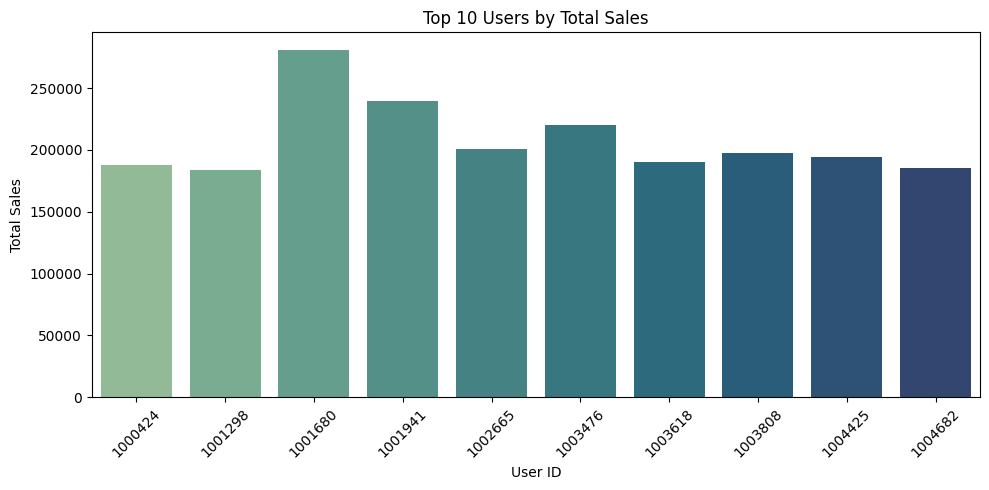

In [40]:
# Analyze unique User_IDs and perform groupby operations
unique_users = df['User_ID'].nunique()
print(f'Total unique users: {unique_users}')

# Group by User_ID to get total orders and sales per user
user_group = df.groupby('User_ID').agg({
    'Total_Orders': 'sum',
    'Total_Sales': ['sum', 'mean', 'count']
}).reset_index()
user_group.columns = ['User_ID', 'Total_Orders', 'Total_Sales_Sum', 'Total_Sales_Mean', 'Order_Count']
user_group.head()

# Find top 10 users by total sales
top_users = user_group.sort_values('Total_Sales_Sum', ascending=False).head(10)
print('Top 10 users by total sales:')
print(top_users)

# Plot top 10 users by total sales
plt.figure(figsize=(10,5))
sns.barplot(data=top_users, x='User_ID', y='Total_Sales_Sum', palette='crest')
plt.title('Top 10 Users by Total Sales')
plt.xlabel('User ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Comparative Graphs: Total Sales by Gender and Occupation, and Sale Amount by Age Group and Gender

C:\Users\Dell\AppData\Local\Temp\ipykernel_10692\181065888.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Gender', palette=custom_palette)


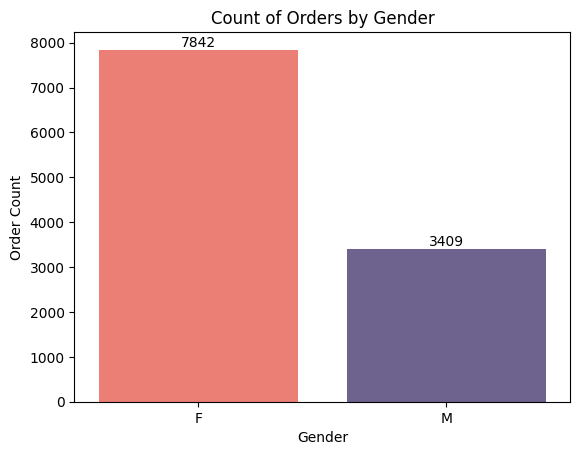

In [29]:
# Countplot of Gender with custom colors and value labels
custom_palette = ['#FF6F61', '#6B5B95']  # Example: pink and purple
ax = sns.countplot(data=df, x='Gender', palette=custom_palette)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count of Orders by Gender')
plt.xlabel('Gender')
plt.ylabel('Order Count')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10692\895434034.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Occupation', y='Total_Sales', estimator=sum, ci=None, order=order, palette='mako')
C:\Users\Dell\AppData\Local\Temp\ipykernel_10692\895434034.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Occupation', y='Total_Sales', estimator=sum, ci=None, order=order, palette='mako')


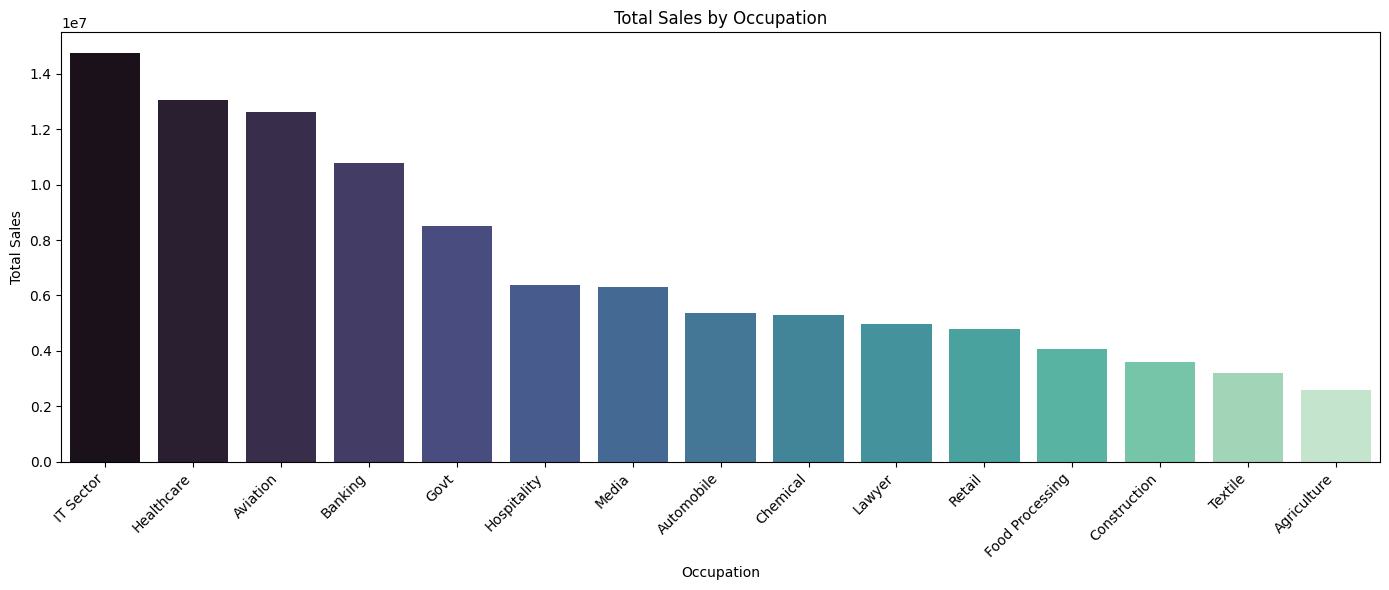

In [34]:
plt.figure(figsize=(14,6))
order = df.groupby('Occupation')['Total_Sales'].sum().sort_values(ascending=False).index
sns.barplot(data=df, x='Occupation', y='Total_Sales', estimator=sum, ci=None, order=order, palette='mako')
plt.title('Total Sales by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

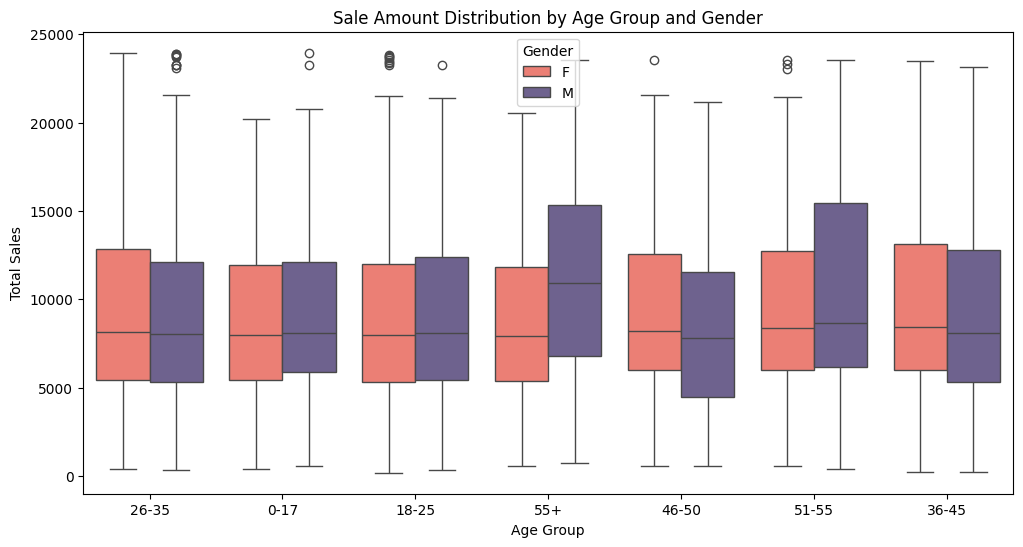

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Age Group', y='Total_Sales', hue='Gender', palette=custom_palette)
plt.title('Sale Amount Distribution by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.legend(title='Gender')
plt.show()

Analysis: State, Gender, Sale Amount, and Order Count

C:\Users\Dell\AppData\Local\Temp\ipykernel_10692\609227169.py:13: UserWarning: Glyph 60971 (\uee2b) missing from current font.
  plt.tight_layout()
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 60971 (\uee2b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 60971 (\uee2b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


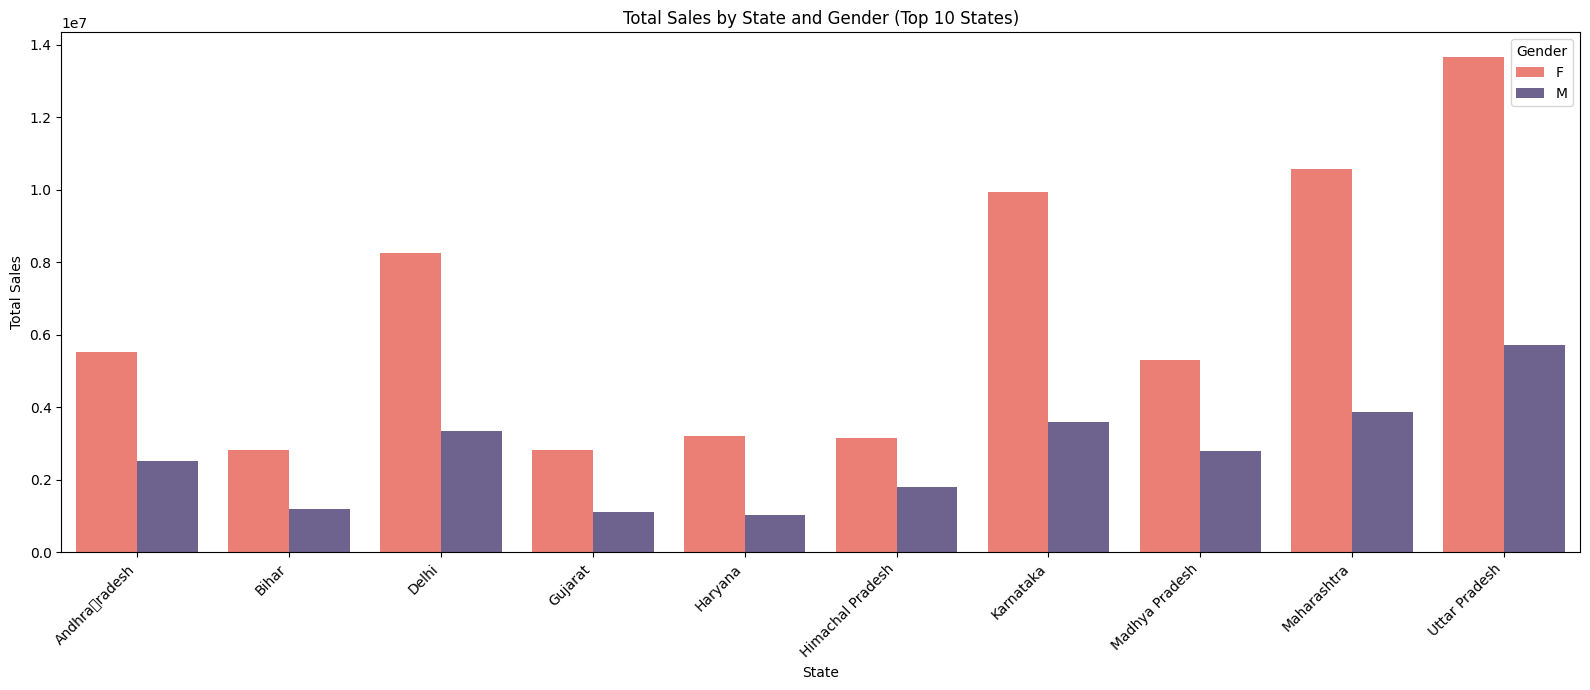

C:\Users\Dell\AppData\Local\Temp\ipykernel_10692\609227169.py:23: UserWarning: Glyph 60971 (\uee2b) missing from current font.
  plt.tight_layout()
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 60971 (\uee2b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 60971 (\uee2b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


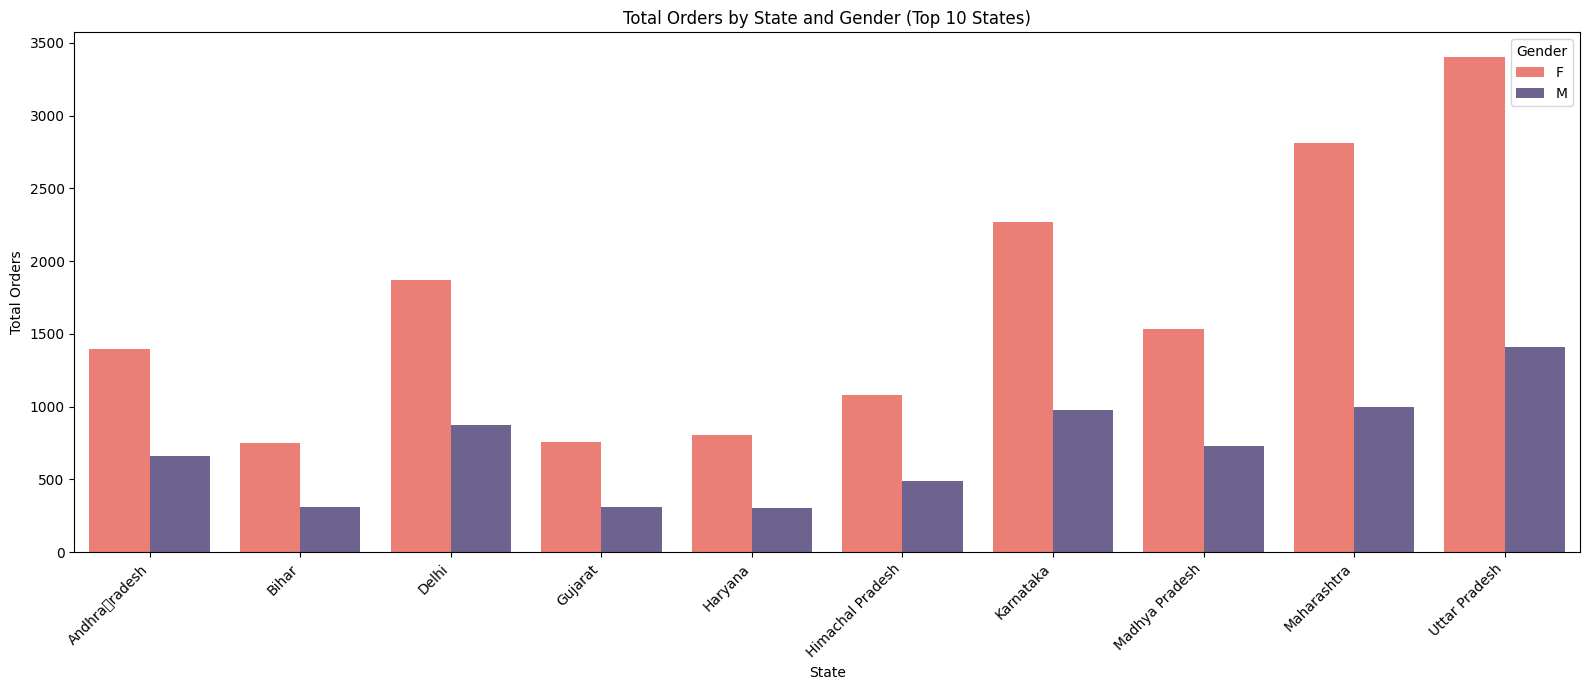

In [ ]:
state_gender_group = df.groupby(['State', 'Gender']).agg({'Total_Sales': 'sum', 'Total_Orders': 'sum'}).reset_index()
top_states = state_gender_group.groupby('State')['Total_Sales'].sum().sort_values(ascending=False).head(10).index
filtered = state_gender_group[state_gender_group['State'].isin(top_states)]

plt.figure(figsize=(16,7))
sns.barplot(data=filtered, x='State', y='Total_Sales', hue='Gender', palette=custom_palette)
plt.title('Total Sales by State and Gender (Top 10 States)')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,7))
sns.barplot(data=filtered, x='State', y='Total_Orders', hue='Gender', palette=custom_palette)
plt.title('Total Orders by State and Gender (Top 10 States)')
plt.xlabel('State')
plt.ylabel('Total Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()